In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.layers import Dense, Activation, Flatten, Convolution2D, Dropout
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import shutil
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv(r'C:\Users\rana ahmed\Desktop\Senior_2\deepLearingproject\Leaf-Classification\leaf-classification\train.csv')
test = pd.read_csv(r'C:\Users\rana ahmed\Desktop\Senior_2\deepLearingproject\Leaf-Classification\leaf-classification\test.csv')


# Concatenate train and test data for consistent processing
combined_data = pd.concat([train, test], ignore_index=True)

# Preparing classes for labeling
traindata = combined_data[['id','species']].copy()
traindata['id'] = traindata['id'].astype(str)
traindata['label'] = LabelEncoder().fit_transform(traindata['species'])


# Loading Images and Linking Labels
images = r'C:\Users\rana ahmed\Desktop\Senior_2\deepLearingproject\Leaf-Classification\leaf-classification\images'

# List comprehension to load images and link labels
imgs = [Image.open(os.path.join(images, i)).convert('1') 
        for i in sorted(os.listdir(images)) 
        if i.split('.')[0] in traindata['id'].values]

# Matching labels using list comprehension
labels = [traindata[traindata['id'] == i.split('.')[0]]['label'].values[0] 
          for i in sorted(os.listdir(images)) 
          if i.split('.')[0] in traindata['id'].values]

# Displaying information
print(f"We have {len(imgs)} images in the dataset")
print(f"Dataset have {len(np.unique(labels))} labels ")

We have 1584 images in the dataset
Dataset have 100 labels 


In [3]:
def load_images_as_arrays(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Filter by file extensions
            img = Image.open(os.path.join(directory, filename))
            img_array = np.array(img)
            images.append(img_array)
    return images

images_as_array = load_images_as_arrays(images)
print(len(images_as_array))  # Check the number of loaded images
print(images_as_array)

1584
[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0,

In [4]:
labels_np = np.array(labels)
labels_np

array([ 3, 54, 20, ..., 99, 99, 53])

In [5]:
def resize_images_and_greyscale(images_array, new_size):
    resized_images = []
    for img in images_array:
        pil_img = Image.fromarray(img)
        # Resize
        resized_img = pil_img.resize(new_size)
        # Convert to grayscale
        grayscale_img = resized_img.convert('L')
        resized_images.append(np.array(grayscale_img))
    return resized_images

# Resize images in the array to a new size (e.g., (64, 64)) and convert to greyscale
resized_images = resize_images_and_greyscale(images_as_array, (64, 64))

# Check the shape of the resized and grayscale images
print("Shape of the first image:", resized_images[0].shape)

Shape of the first image: (64, 64)


In [6]:
resized_images = np.expand_dims(resized_images, axis=-1)
print("Shape of the first image:", resized_images[0].shape)

Shape of the first image: (64, 64, 1)


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(resized_images, labels_np, test_size=0.2, random_state=42,stratify=labels_np)
X_train,X_val,Y_train,Y_val= train_test_split(X_train, Y_train, test_size=0.2, random_state=42,stratify=Y_train)

print(f"Data have {len(X_train)} images for training")
print(f"Data have {len(X_test)} images for testing")
print(f"Data have {len(X_val)} images for validatio")
print(f"Training data consist of  {len(np.unique(Y_train))} classes ")
print(f"Testing data consist of {len(np.unique(Y_test))} classes")
print(f"Validating data consist of {len(np.unique(Y_val))} classes")

Data have 1013 images for training
Data have 317 images for testing
Data have 254 images for validatio
Training data consist of  100 classes 
Testing data consist of 100 classes
Validating data consist of 100 classes


In [8]:
# Display the new shapes after augmentation
print("Shapes befor augmentation:")
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_val shape:", X_val.shape)
print("Y_val shape:", Y_val.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

Shapes befor augmentation:
X_train shape: (1013, 64, 64, 1)
Y_train shape: (1013,)
X_val shape: (254, 64, 64, 1)
Y_val shape: (254,)
X_test shape: (317, 64, 64, 1)
Y_test shape: (317,)


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

Y_train_reshaped = Y_train.reshape(-1, 1)
Y_val_reshaped= Y_val.reshape(-1, 1)
# Create separate instances of ImageDataGenerator for each dataset
datagen_train = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen_val = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)  
datagen_test = ImageDataGenerator()

# Reshape your datasets to have 4 dimensions (batch,height, width, channels)
X_train_reshaped = X_train.reshape(-1,64, 64, 1)
X_val_reshaped = X_val.reshape(-1,64, 64, 1)
X_test_reshaped = X_test.reshape(-1,64, 64, 1)

print(X_val_reshaped.shape)
print(X_test_reshaped.shape)


# Fit the ImageDataGenerator on your training data
datagen_train.fit(X_train_reshaped)
datagen_train.fit(X_val_reshaped)


# Generate augmented images for each dataset
num_augmented_images = 1000  # Choose the number of augmented images to generate for each set
num_augmented_images2=200

# Augment the training set
augmented_images_train = []
augmented_labels_train = []
for images, labels in datagen_train.flow(X_train_reshaped, Y_train_reshaped, batch_size=num_augmented_images):
    augmented_images_train.append(images)
    augmented_labels_train.append(labels[:len(images)])  # Align labels with augmented images

    if len(augmented_images_train) * num_augmented_images >= len(X_train_reshaped):
        break

# Augment the training set
augmented_images_val = []
augmented_labels_val = []
for images, labels in datagen_train.flow(X_val_reshaped, Y_val_reshaped, batch_size=num_augmented_images2):
    augmented_images_val.append(images)
    augmented_labels_val.append(labels[:len(images)])  # Align labels with augmented images

    if len(augmented_images_val) * num_augmented_images2 >= len(X_val_reshaped):
        break


# Convert lists to arrays
augmented_images_train = np.concatenate(augmented_images_train, axis=0)
augmented_labels_train = np.concatenate(augmented_labels_train, axis=0)

augmented_images_val=np.concatenate(augmented_images_val, axis=0)
augmented_labels_val=np.concatenate(augmented_labels_val, axis=0)

# Ensure labels have the appropriate shape for concatenation
augmented_labels_train = augmented_labels_train.reshape(-1,1)
print(augmented_labels_train.shape)

# Ensure labels have the appropriate shape for concatenation
augmented_labels_val = augmented_labels_val.reshape(-1,1)
print(augmented_labels_val.shape)

X_train_final = np.vstack((X_train_reshaped, augmented_images_train))
Y_train_final = np.vstack((Y_train_reshaped, augmented_labels_train))
print(Y_train_final.shape)

# Augment the validation set (no augmentation here, just reshaping)
X_val_final = np.vstack((X_val_reshaped, augmented_images_val))
Y_val_final =np.vstack((Y_val_reshaped, augmented_labels_val))


# Augment the test set (no augmentation here, just reshaping)
datagen_test.fit(X_test_reshaped)
X_test_final = X_test_reshaped
Y_test_final = Y_test

# Display the new shapes after augmentation
print("Shapes after augmentation:")
print("X_train_final shape:", X_train_final.shape)
print("Y_train_final shape:", Y_train_final.shape)
print("X_val_final shape:", X_val_final.shape)
print("Y_val_final shape:", Y_val_final.shape)
print("X_test_final shape:", X_test_final.shape)
print("Y_test_final shape:", Y_test_final.shape)

print("Number of samples:")
print(f"Data have {len(X_train_final)} images for training")
print(f"Data have {len(X_val_final)} images for testing")
print(f"Data have {len(X_test_final)} images for validatio")
print(f"Training data consist of  {len(np.unique(Y_train_final))} classes ")
print(f"Testing data consist of {len(np.unique(Y_val_final))} classes")
print(f"Validating data consist of {len(np.unique(Y_test_final))} classes")

(254, 64, 64, 1)
(317, 64, 64, 1)
(1013, 1)
(254, 1)
(2026, 1)
Shapes after augmentation:
X_train_final shape: (2026, 64, 64, 1)
Y_train_final shape: (2026, 1)
X_val_final shape: (508, 64, 64, 1)
Y_val_final shape: (508, 1)
X_test_final shape: (317, 64, 64, 1)
Y_test_final shape: (317,)
Number of samples:
Data have 2026 images for training
Data have 508 images for testing
Data have 317 images for validatio
Training data consist of  100 classes 
Testing data consist of 100 classes
Validating data consist of 100 classes


In [10]:
# Then, create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_final, Y_train_final))
validation_dataset = tf.data.Dataset.from_tensor_slices((X_val_final, Y_val_final))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_final, Y_test_final))

In [11]:
# Batch and shuffle the datasets
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(len(X_train)).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.shuffle(len(X_val)).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

print(f"length of train dataset is {len(train_dataset)}")
print(f"length of validation dataset is {len(validation_dataset)}")
print(f"length of Testing dataset is {len(test_dataset)}")

length of train dataset is 64
length of validation dataset is 16
length of Testing dataset is 10


In [12]:
# Define the CNN model using Keras Functional API
Model1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64, 64, 1)), 
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu',strides=(1, 1), padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu',strides=(1, 1), padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(100, activation='softmax')
])



In [13]:
Model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 128)        0

In [15]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import regularizers


def train_model(Train_dataset,Validation_dataset, batch_size, optimizer, learning_rate, weight_decay,num_epochs):

    Model1
    if optimizer == 'SGD':
        optimizer = SGD(learning_rate=learning_rate, decay=weight_decay)
    elif optimizer == 'Adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'RMSprop':
        optimizer = RMSprop(learning_rate=learning_rate, decay=weight_decay)

    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
    Model1.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])


    history = Model1.fit(Train_dataset, epochs=num_epochs,validation_data=Validation_dataset, batch_size=batch_size)
       

    return history

In [16]:
print('Result for adam optimizer,learning_rate=0.001,epoch =30, weight_decay =0.001')

trial1 = train_model(train_dataset,validation_dataset,32,'Adam',0.001,0.001,60)

Result for adam optimizer,learning_rate=0.001,epoch =30, weight_decay =0.001
Epoch 1/60
64/64 [==============================] - 7s 104ms/step - loss: 6.8221 - accuracy: 0.3036 - val_loss: 3.7536 - val_accuracy: 0.3740
Epoch 2/60
64/64 [==============================] - 6s 100ms/step - loss: 3.7888 - accuracy: 0.3736 - val_loss: 3.5838 - val_accuracy: 0.3740
Epoch 3/60
64/64 [==============================] - 6s 97ms/step - loss: 3.6265 - accuracy: 0.3741 - val_loss: 3.6145 - val_accuracy: 0.3740
Epoch 4/60
64/64 [==============================] - 6s 101ms/step - loss: 3.4492 - accuracy: 0.3741 - val_loss: 3.3911 - val_accuracy: 0.3740
Epoch 5/60
64/64 [==============================] - 7s 102ms/step - loss: 3.2579 - accuracy: 0.3756 - val_loss: 3.3505 - val_accuracy: 0.3701
Epoch 6/60
64/64 [==============================] - 7s 103ms/step - loss: 3.0634 - accuracy: 0.3791 - val_loss: 3.2887 - val_accuracy: 0.3720
Epoch 7/60
64/64 [==============================] - 6s 101ms/step - loss

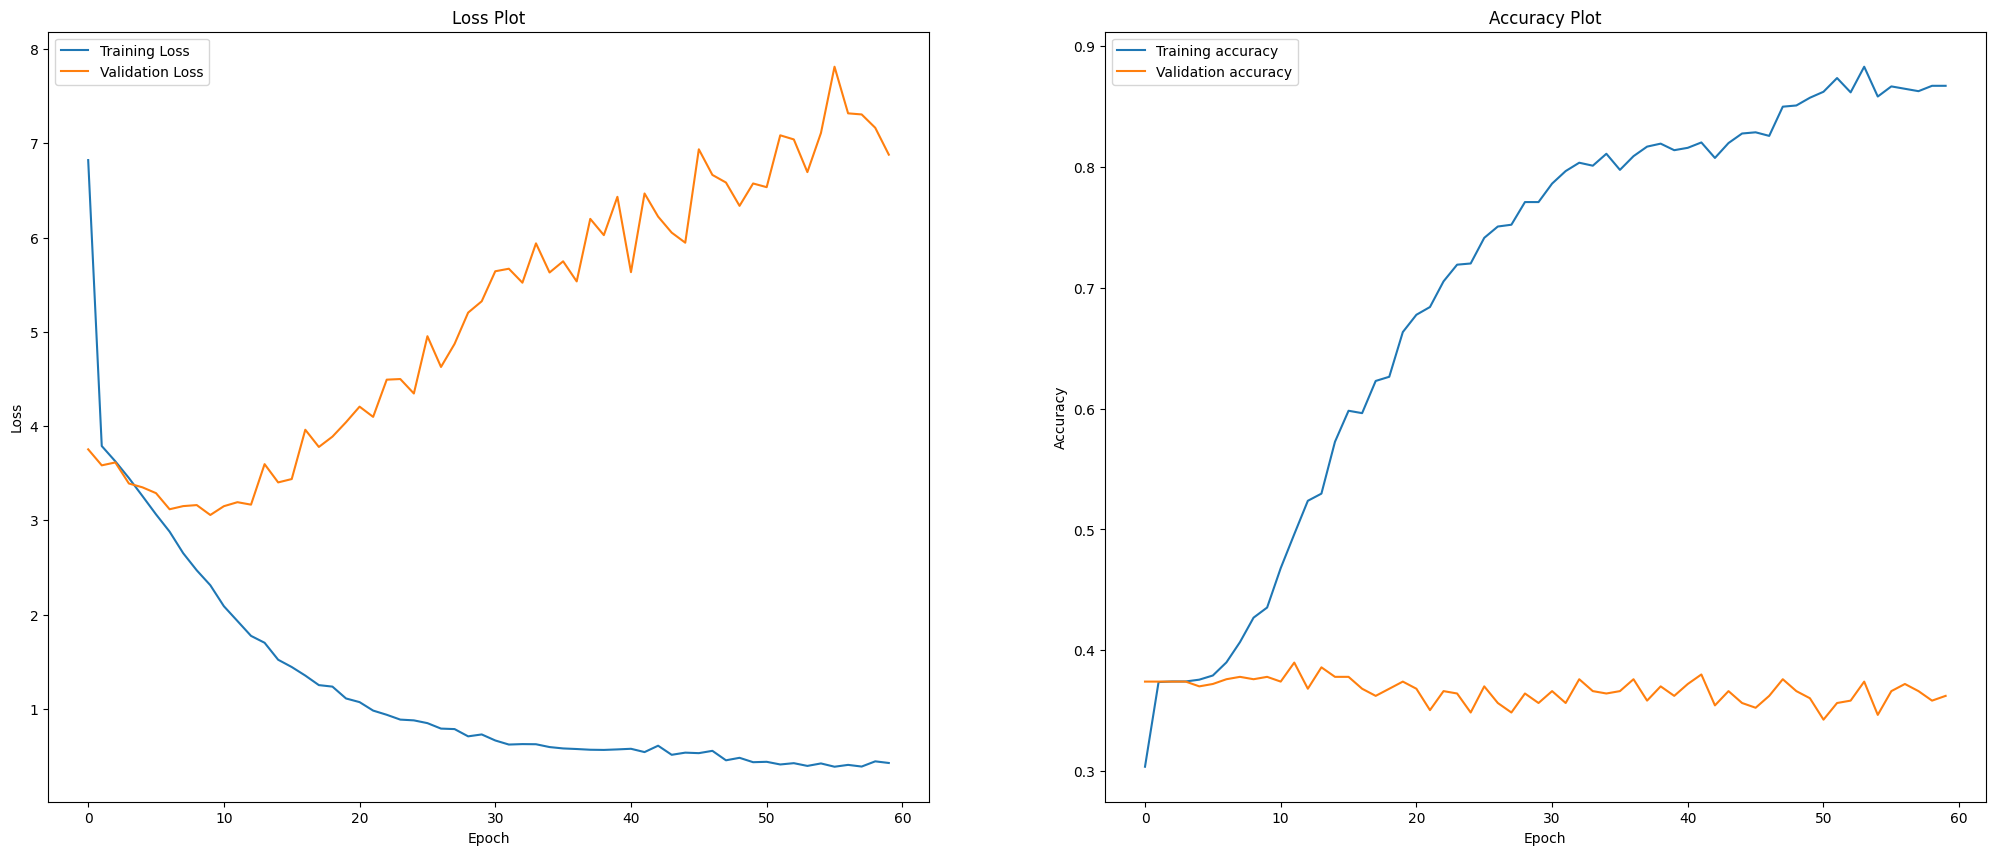

In [17]:
fig,ax=plt.subplots(1,2,figsize=(25,10))
ax[0].plot(trial1.history["loss"],label="Training Loss")
ax[0].plot(trial1.history["val_loss"],label="Validation Loss")
ax[0].set_title("Loss Plot")
ax[0].set_ylabel("Loss")
ax[0].set_xlabel("Epoch")
ax[0].legend()

ax[1].plot(trial1.history["accuracy"],label="Training accuracy")
ax[1].plot(trial1.history["val_accuracy"],label="Validation accuracy")
ax[1].set_title("Accuracy Plot")
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].legend()

plt.show()

In [20]:
from tensorflow.keras import models
from tensorflow.keras import layers


network = models.Sequential()

# First Convolutional layer with (3,3) matrix size, same padding refers to add additional columns or rows to align
# with the filter and a maxpooling layers which takes maximum value in the (3,3) pixel value matrix.
network.add(layers.Conv2D(10,(3,3), padding='same', activation='relu', input_shape = (64,64,1)))
network.add(layers.MaxPool2D((2,2)))

# Second convolutional layer same as above but this one produces 512 feature maps unlike 10 above.
network.add(layers.Conv2D(512,(3,3), padding='same', activation='relu'))
network.add(layers.MaxPool2D((2,2)))

# Third convolutional layer same as above but this one produces 256 feature maps unlike 512 above.
network.add(layers.Conv2D(256,(3,3), padding='same', activation='relu'))
network.add(layers.MaxPool2D((2,2)))

# Fourth convolutional layer same as above but this one produces 128 feature maps unlike 256 above.
network.add(layers.Conv2D(128,(3,3), padding='same', activation='relu'))
network.add(layers.MaxPool2D((2,2)))

# Flatten layer
network.add(layers.Flatten())

# Dropout layer of 25%
network.add(layers.Dropout(0.25))

# Dense layer of 512 neurons with L2 regularization and ReLU activation function
network.add(layers.Dense(512, kernel_regularizer = regularizers.l2(0.01), activation='relu'))

# Dropout layer of 20% 
network.add(layers.Dropout(0.2))

# Dense Layer of 512 neurons with L2 regularization and ReLU activation function
network.add(layers.Dense(512, kernel_regularizer = regularizers.l2(0.01), activation='relu'))

# Final Dense Layer with number of neurons same as number of classes of classification and 'softmax' as the 
# activation function
# softmax is useful because it converts the output layer into what is essentially a probability distribution.
network.add(layers.Dense(100, activation='softmax'))

In [21]:
network.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 10)        100       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 512)       46592     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 512)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 256)       1179904   
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 256)       

In [23]:
def train_model2(Train_dataset,Validation_dataset, batch_size, optimizer, learning_rate, weight_decay,num_epochs):

    network
    if optimizer == 'SGD':
        optimizer = SGD(learning_rate=learning_rate, decay=weight_decay)
    elif optimizer == 'Adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'RMSprop':
        optimizer = RMSprop(learning_rate=learning_rate, decay=weight_decay)

    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
    network.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])


    history = network.fit(Train_dataset, epochs=num_epochs,validation_data=Validation_dataset, batch_size=batch_size)
       

    return history

In [24]:
print('Result for adam optimizer,learning_rate=0.001,epoch =30, weight_decay =0.001')

trial2 = train_model2(train_dataset,validation_dataset,32,'Adam',0.001,0.001,60)

Result for adam optimizer,learning_rate=0.001,epoch =30, weight_decay =0.001
Epoch 1/60


64/64 [==============================] - 28s 421ms/step - loss: 14.7835 - accuracy: 0.3539 - val_loss: 11.5950 - val_accuracy: 0.3740
Epoch 2/60
64/64 [==============================] - 28s 439ms/step - loss: 10.3459 - accuracy: 0.3751 - val_loss: 9.4446 - val_accuracy: 0.3740
Epoch 3/60
64/64 [==============================] - 27s 422ms/step - loss: 8.4084 - accuracy: 0.3746 - val_loss: 7.6126 - val_accuracy: 0.3740
Epoch 4/60
64/64 [==============================] - 28s 443ms/step - loss: 6.9673 - accuracy: 0.3736 - val_loss: 6.4772 - val_accuracy: 0.3740
Epoch 5/60
64/64 [==============================] - 27s 421ms/step - loss: 6.0123 - accuracy: 0.3756 - val_loss: 5.6218 - val_accuracy: 0.3740
Epoch 6/60
64/64 [==============================] - 27s 416ms/step - loss: 5.2706 - accuracy: 0.3741 - val_loss: 5.0768 - val_accuracy: 0.3386
Epoch 7/60
64/64 [==============================] - 27s 415ms/step - loss: 4.7445 - accuracy: 0.3771 - val_loss: 4.6295 - val_accuracy: 0.3563
Epoch 8

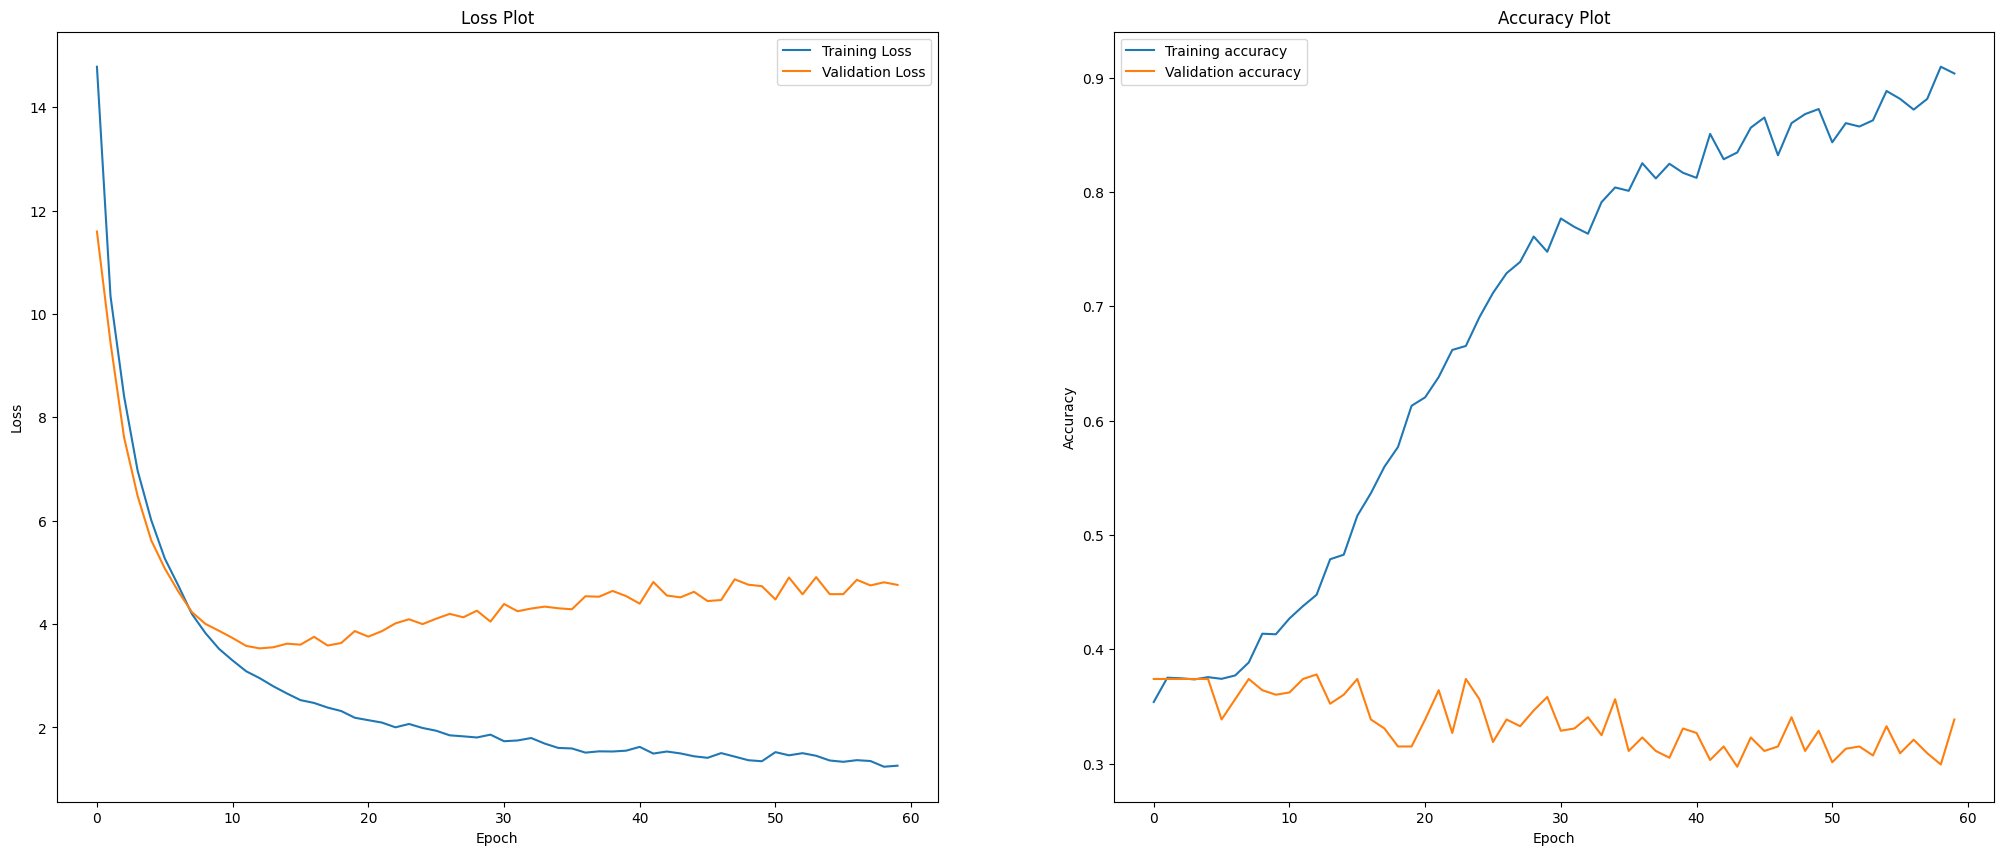

In [25]:
fig,ax=plt.subplots(1,2,figsize=(25,10))
ax[0].plot(trial2.history["loss"],label="Training Loss")
ax[0].plot(trial2.history["val_loss"],label="Validation Loss")
ax[0].set_title("Loss Plot")
ax[0].set_ylabel("Loss")
ax[0].set_xlabel("Epoch")
ax[0].legend()

ax[1].plot(trial2.history["accuracy"],label="Training accuracy")
ax[1].plot(trial2.history["val_accuracy"],label="Validation accuracy")
ax[1].set_title("Accuracy Plot")
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].legend()

plt.show()

In [26]:
def test_results(model, testing_data):

    test_loss, test_acc = model.evaluate(testing_data, verbose=2)
    print('Test loss: {loss:.2f}'.format(loss=test_loss))
    print('Test accuracy: {acc:.2f}%'.format(acc=test_acc*100))
    return

test_results(network,test_dataset)

10/10 - 1s - loss: 3.8676 - accuracy: 0.4322 - 1s/epoch - 109ms/step
Test loss: 3.87
Test accuracy: 43.22%
